# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 
****

In [214]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [215]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [216]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


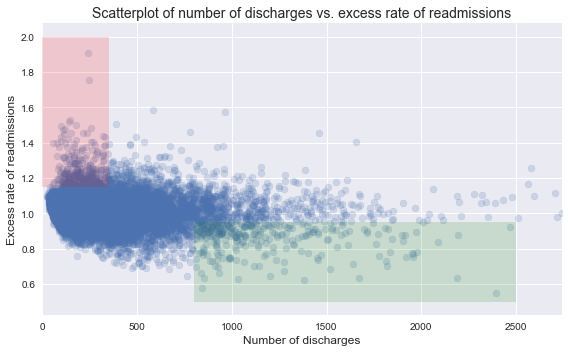

In [217]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

The preliminary analysis looks at the relationship between the rate of discharge and the rate of readmissions (using the ratio of predicted readmission vs. expected readmissions for an average hospital). The analysis concluded that readmissions are lower in hospitals with higher rates of discharge (i.e. in larger hospitals). This seems like a pretty cursory conclusion. Let's see if it's actually correct. 

There are really two types of metrics in this dataset - the size of the hospital (discharges) and the readmission rates (prediced, expected, number and ratio), so as with the preliminary analysis we will assess the relationship between these two. 

To test this assumption, we will use the following hypothesis test:

H0: The rate of readmission for small hospitals (lower quartile) is not statisitcally different from the rate of readmission for large hospitals (top quartile by discharge). 
Ha: There is a statisically significiant difference in rate of readmission between small and large hospitals.

Significance level: alpha = 0.01

In [218]:
#further cleaning and viewing the data 
df = clean_hospital_read_df.loc[:, clean_hospital_read_df.columns != 'Footnote']
df = df.dropna(axis = 0)
df = df.sort_values(['Number of Discharges'])
df.describe()

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,1.909500,32.800000,28.000000,879.000000


In [219]:
# A quick check of the pearsons correlation shows a very small negative correlation with Readmission Ratio and Discharge
import scipy.stats as stats
stats.pearsonr(df['Excess Readmission Ratio'], df['Number of Discharges'])

(-0.097397943510793519, 1.222547377680967e-25)

In [220]:
#split the hospitals by size (discharge) 
q1 = df['Number of Discharges'].quantile(.25)
q4 = df['Number of Discharges'].quantile(.75)
def size_hosp(row):
    if row['Number of Discharges'] < q1 : return "small"
    if row['Number of Discharges'] > q4 : return "large"
    else: return "medium"
df['Hosp_Size'] = df.apply(size_hosp, axis = 1)

df_small = df[df.Hosp_Size == 'small']
df_large = df[df.Hosp_Size == 'large']

In [221]:
#calculate the mean and variance for each population
mean_small = np.mean(df_small['Excess Readmission Ratio'])
mean_large = np.mean(df_large['Excess Readmission Ratio'])
var_small = np.var(df_small['Excess Readmission Ratio'])
var_large = np.var(df_large['Excess Readmission Ratio'])

In [222]:
mean_small, mean_large, mean_diff

(1.0161217814892145, 0.9966670731707346, 0.019454708318479952)

Because we know the population standard deviation and the sample size for each group is above 30, we will use the z-score. For an alpha of 0.01, and a two-tailed test, the critical value is 2.33. 

In [223]:
z_crit = 2.33
mean_diff = mean_small - mean_large
se = np.sqrt(var_small / n_small + var_large /n_large)
m_error = z_crit * se 
conf_int = (mean_diff - m_error, mean_diff + m_error)
print('Expected readmission difference {}' .format(conf_int))

Expected readmission difference (0.013882032583608643, 0.025027384053351261)


The above confidence interval (for an alpha of 0.01) ranges from 0.013 to 0.025. Since the entire confidence interval is above zero, we can assert that there is a statistically significant difference between the small and large hospitals readmission rates.   

As for visualizing the data, a more powerful way to view the spread of readmission rates for small, medium, and large hospitals is with a box plot. From the box plot, we can see how CMS has standardized expected readmissions rate based on hospital size. All three hospital size groupings have a mean at readmission ratio = 1. The small hospitals have a tighter spread across than the medium and larger hospitals, and all three groups have some outliers. The small hospitals have far fewer outliers with low readmission ratios.

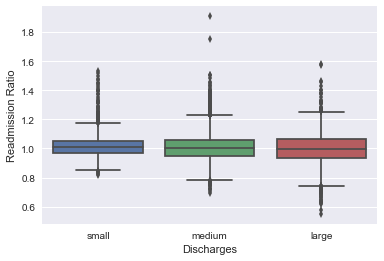

In [224]:
_ = sns.boxplot(x= 'Hosp_Size', y = 'Excess Readmission Ratio', data = df)
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Readmission Ratio')
plt.show()

#### Summary
Fundamentally, this dataset is pretty limtted to draw policy recommendations around readmission rates. Assuming the recommendations are for hospitals, information like "duration of stay prior to discharge" or "readmission history for individual patients" would likely be a much better indicator of future admissions status. 


However, the analysis does show that there is a difference in readmission ratio for small and large hospitals. CMS could consider providing additional resources (such as pre-discharge counseling) to smaller hospitals to support patients at discharge. 